In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (7, 3.5)
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
NFFT = 4096
fs = 20e6
freq_axis = np.fft.fftshift(np.fft.fftfreq(NFFT, 1/fs))*1e-6

In [3]:
# data recorded with 50R load in RX port and --rx_gain 73
x = np.fromfile('QO-100_WB_2023-03-19T12_08_29_spectrum', 'float32').reshape(-1, NFFT)
x.shape

(72, 4096)

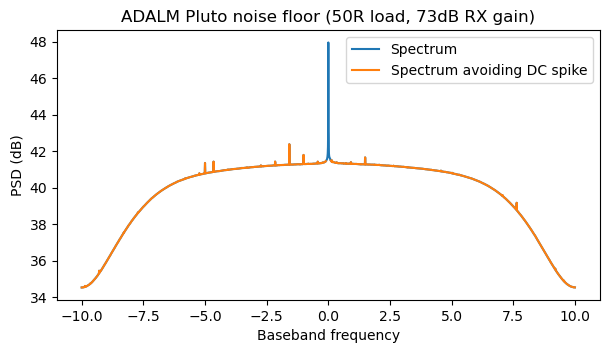

In [4]:
spec = np.average(x, axis=0)
spec_dc_null = spec.copy()
span = 20
spec_dc_null[2048-span:2048+span+1] = np.nan
plt.plot(freq_axis, 10*np.log10(spec), label='Spectrum')
plt.plot(freq_axis, 10*np.log10(spec_dc_null), label='Spectrum avoiding DC spike')
plt.title('ADALM Pluto noise floor (50R load, 73dB RX gain)')
plt.xlabel('Baseband frequency')
plt.ylabel('PSD (dB)')
plt.legend();

[-1.40775446e+04  6.64695717e+01  7.12524746e+03 -8.18497899e+00
 -1.94340155e+02 -9.93809249e+00 -3.04331301e+02  2.74108161e+00
  2.97240984e+01 -2.27105562e-01 -2.62923023e+00  8.50864956e-03
  1.00000000e+00]


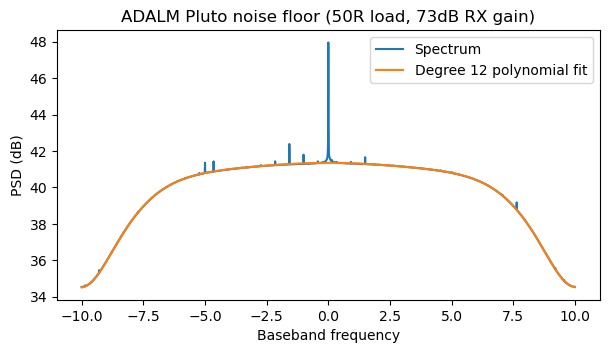

In [5]:
faxis = np.fft.fftshift(np.fft.fftfreq(spec.size))
poly = np.polyfit(faxis[~np.isnan(spec_dc_null)],
                  spec_dc_null[~np.isnan(spec_dc_null)], 12)
poly_norm = poly / poly[-1]
plt.plot(freq_axis, 10*np.log10(spec), label='Spectrum')
plt.plot(freq_axis, 10*np.log10(np.polyval(poly, faxis)), label='Degree 12 polynomial fit')
plt.title('ADALM Pluto noise floor (50R load, 73dB RX gain)')
plt.xlabel('Baseband frequency')
plt.ylabel('PSD (dB)')
plt.legend()
print(poly_norm)
np.save('bandpass_polynomial_calibration.npy', poly_norm)

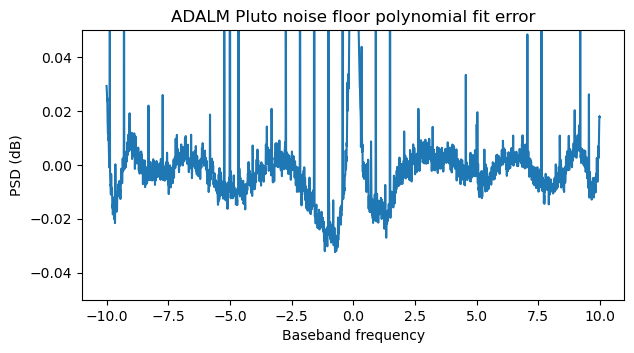

In [6]:
plt.plot(freq_axis, 10*np.log10(spec) - 10*np.log10(np.polyval(poly, faxis)))
plt.ylim(-0.05, 0.05)
plt.title('ADALM Pluto noise floor polynomial fit error')
plt.xlabel('Baseband frequency')
plt.ylabel('PSD (dB)');